# L3: Image generation app 🎨

Load your HF API key and relevant Python libraries

In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [30]:
# Helper function
import requests, json

#Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }   
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    contents = response.content
    return contents

## Building an image generation app 

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.

### How about running it locally?
The code would look very similar if you were running it locally instead of from an API.
```py
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

def get_completion(prompt):
    return pipeline(prompt).images[0]    
```


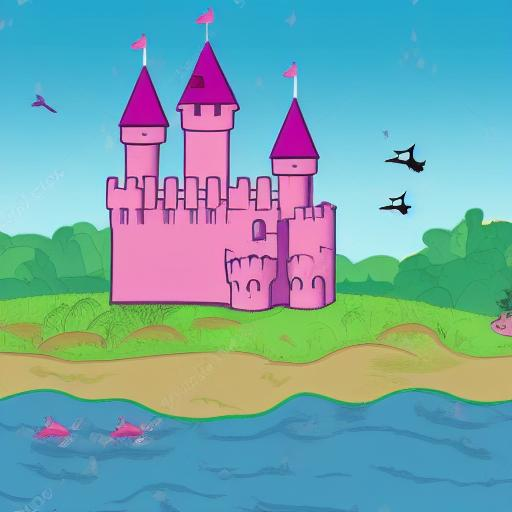

In [51]:
prompt = "a dog in a park"
prompt = "A beautiful castle surronded by small pink birds and a crocodile swimming in the river"
result = get_completion(prompt)

# Assuming 'result' contains the binary data of the image in PNG format
image = Image.open(io.BytesIO(result))

# Convert the image binary data to base64 encoding
image_data = io.BytesIO()
image.save(image_data, format="PNG")
image_base64 = base64.b64encode(image_data.getvalue()).decode("utf-8")
html_code = f'<img src="data:image/png;base64,{image_base64}" />'
IPython.display.HTML(html_code)

## Generating with `gr.Interface()`

In [72]:
import gradio as gr 

#A helper function to convert the PIL image to base64
#so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt):
    output = get_completion(prompt)
    print(output)
    image = Image.open(io.BytesIO(output))
    # Convert the image binary data to base64 encoding
    image_data = io.BytesIO()
    image.save(image_data, format="PNG")
    image_base64 = base64.b64encode(image_data.getvalue()).decode("utf-8")
    result_image = base64_to_pil(image_base64)
    return result_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])

demo.launch()
# demo.launch(share=True, server_port=int(os.environ['PORT1']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [63]:
demo.close()

Closing server running on port: 7860


## Building a more advanced interface

In [78]:
import gradio as gr 

#A helper function to convert the PIL image to base64 
# so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }
    
    output = get_completion(prompt, params)
    print(output)
    image = Image.open(io.BytesIO(output))
    # Convert the image binary data to base64 encoding
    image_data = io.BytesIO()
    image.save(image_data, format="PNG")
    image_base64 = base64.b64encode(image_data.getvalue()).decode("utf-8")
    pil_image = base64_to_pil(image_base64)
    return pil_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7, 
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch()
# demo.launch(share=True, server_port=int(os.environ['PORT2']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

Traceback (most recent call last):
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/a

b'{"error":"\'float\' object cannot be interpreted as an integer"}'


Traceback (most recent call last):
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/a

b'{"error":"\'float\' object cannot be interpreted as an integer"}'


Traceback (most recent call last):
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/workspaces/exploring/building-genai-applications-with-gradio/venvs/default_venv/lib/python3.10/site-packages/a

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [79]:
demo.close()

Closing server running on port: 7860


## `gr.Blocks()` to the rescue!

In [81]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch()
# demo.launch(share=True, server_port=int(os.environ['PORT3']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [83]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too
            
    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch()
# demo.launch(share=True, server_port=int(os.environ['PORT4']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [84]:
gr.close_all()

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
